In [6]:
import tensorflow as tf
import pandas as pd
import numpy as np
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
# import seaborn as sns

In [9]:
feature_names = pd.read_csv('../../../Dataset/STS/Data_Names.csv')
header = feature_names['features'].tolist()
#set header for the dataset
dataset = pd.read_csv('../../../Dataset/STS/Data_STS.csv')
dataset.columns = header
dataset.head()

,Stand-to-stand time,Sit-to-stand time,Stand-to-sit time,M_hip vertical range,M_hip depth range,M_hip max vertical velocity,M_hip min vertical velocity,M_hip max depth velocity,M_hip min depth velocity,Knee flexo-extension range,...,M_shoulder min vertical velocity,M_shoulder max depth velocity,Spine flexo-extension range,Spine flexo-extension max velocity,Spine flexo-extension min velocity,Spine abduction-adduction range,Spine abduction-adduction max velocity,Spine abduction-adduction min velocity,Heart Rate,Fatigue Condition
0,1.1494,1.0219,1.0460,1.01510,0.96060,0.98215,1.3183,0.91062,0.92036,1.00250,...,0.97932,1.00380,1.2178,0.97569,0.98219,0.99926,1.28480,1.06290,1.2469,1
1,1.2150,1.0994,1.0804,0.87648,0.89024,0.99210,1.3177,0.93530,0.92490,0.98812,...,0.94320,1.07840,1.3523,0.95966,0.94077,0.96024,1.13840,1.01810,1.2537,1
2,1.0712,0.9929,1.0965,0.89684,0.95366,1.00890,1.1206,0.95903,0.93991,1.06500,...,0.97629,1.03280,1.3074,0.88624,0.92409,0.94021,0.96528,0.85533,1.2622,1
3,1.3106,1.3771,1.2195,1.08700,1.10530,1.00650,1.4565,1.07270,1.15530,1.07220,...,1.14290,0.94031,1.4270,1.00150,1.01930,1.01720,1.41930,1.06020,1.2677,2
4,1.2767,1.2298,1.2643,1.12390,1.15170,0.95774,1.3920,1.03950,1.06770,1.00600,...,1.08630,1.15530,1.5117,1.03520,1.01060,1.01600,1.16110,1.04280,1.3722,2


In [10]:
X = dataset.iloc[:, :-1]
y = dataset.iloc[:, -1] - 1

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
y = to_categorical(y)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

model = tf.keras.models.load_model('../../../Model/STS/Baseline/sts_model')

y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)
y_test = np.argmax(y_test, axis=1)

cm = confusion_matrix(y_test, y_pred)
cm

5/5 [==============================] - 0s 26ms/step


array([[32,  0,  0],
       [ 2, 55,  7],
       [ 0,  9, 27]])

In [11]:
def median_euclidean_distance(data_point, data_set):
    # 确保数据点和数据集是NumPy数组
    data_point = np.array(data_point)
    data_set = np.array(data_set)

    # 计算数据集中每个特征的中位数
    medians = np.median(data_set, axis=0)

    # 计算数据点与中位数之间的欧氏距离
    distance = np.sqrt(np.sum((data_point - medians) ** 2))

    return distance

In [12]:
high_medium_indices = [i for i, (true, pred) in enumerate(zip(y_test, y_pred)) if true == 2 and pred == 1]
high_medium_features = X.iloc[high_medium_indices, :]
high_medium_features

,Stand-to-stand time,Sit-to-stand time,Stand-to-sit time,M_hip vertical range,M_hip depth range,M_hip max vertical velocity,M_hip min vertical velocity,M_hip max depth velocity,M_hip min depth velocity,Knee flexo-extension range,...,M_shoulder max vertical velocity,M_shoulder min vertical velocity,M_shoulder max depth velocity,Spine flexo-extension range,Spine flexo-extension max velocity,Spine flexo-extension min velocity,Spine abduction-adduction range,Spine abduction-adduction max velocity,Spine abduction-adduction min velocity,Heart Rate
11,1.3455,1.29440,1.19870,1.2180,1.2970,1.11360,1.53470,1.23810,1.1934,1.10950,...,1.1844,1.18170,1.09940,1.49540,1.07250,1.1591,0.88354,1.3729,1.2017,1.3545
14,1.3375,1.38790,1.32960,1.0051,1.0457,0.99677,1.49100,1.09130,1.1133,1.05080,...,1.0791,1.13220,1.16980,1.25400,1.15390,1.2121,0.85836,1.4214,1.2367,1.4721
31,1.3997,1.41620,1.16540,1.0119,1.0157,1.02450,1.20610,1.06270,1.0086,1.01160,...,1.0180,1.07540,1.08640,1.21690,1.10810,1.1064,1.04580,1.2665,1.1346,1.5268
70,1.3560,0.99455,1.34050,1.1841,1.1882,1.10860,1.12270,1.01670,1.1865,1.14940,...,1.1837,1.01850,1.14620,0.85064,1.11350,1.2029,1.10990,1.3892,1.2146,1.5506
90,1.1058,1.44740,0.90661,1.2845,1.2521,1.00760,1.51880,0.55570,1.1621,1.01550,...,1.2130,0.52609,0.91096,1.18240,0.70363,1.2256,0.98638,1.0024,1.3193,1.8339
95,1.2100,1.21690,0.88336,1.0870,1.0689,0.92794,0.93536,1.08250,1.0669,0.83101,...,1.0869,1.12500,0.83193,1.17660,1.08180,1.0264,0.65936,1.0652,1.0488,1.3076
119,1.1198,1.20580,1.05930,1.0764,1.0646,0.94769,1.36990,1.01910,1.0328,0.84800,...,1.0480,0.99408,0.94524,1.19310,1.09720,1.0169,0.87316,1.3438,1.1941,1.3707
124,1.2033,1.26180,1.16490,1.0469,1.0337,1.03810,1.30150,1.04600,1.0370,0.89920,...,1.0510,1.03320,0.90261,1.14090,1.07620,1.0764,1.05980,1.2247,1.1029,1.3376
131,1.4450,1.46360,1.06720,1.2645,1.2216,1.10530,1.53300,0.96526,1.2169,1.07550,...,1.2446,0.97281,0.95524,1.45040,1.17320,1.1192,1.14080,1.8603,1.1993,1.4635


In [25]:
from maraboupy import Marabou
# Load the network
network = Marabou.read_onnx('../Model/STS/FeatureReduced/sts_model_top10_without_softmax.onnx')

# Get the input and output variable numbers, assuming a single input and output
inputVars = network.inputVars[0][0]
outputVars = network.outputVars[0]

# Set the input constraints for the particular data point you want to test
data_point = high_medium_features  # Replace with the values of your data point
data_point

,Spine abduction-adduction max velocity,Ankle flexo-extension range,Spine abduction-adduction range,Hip flexo-extension max velocity,M_shoulder depth range,Hip flexo-extension range,Spine flexo-extension min velocity,Stand-to-stand time,Spine abduction-adduction min velocity,M_hip depth range
12,1.1564,1.1564,0.66097,0.66097,0.78686,1.20520,1.20520,1.3050,1.2545,1.2866
14,1.4214,1.4214,0.85836,0.85836,0.79349,1.21210,1.21210,1.3375,1.2367,1.0457
31,1.2665,1.2665,1.04580,1.04580,0.81767,1.10640,1.10640,1.3997,1.1346,1.0157
49,1.3565,1.3565,1.03430,1.03430,0.79461,1.16600,1.16600,1.0351,1.1819,1.1529
74,1.1068,1.1068,0.97276,0.97276,0.91288,0.99207,0.99207,1.1975,1.0763,1.0013
89,1.2183,1.2183,0.68698,0.68698,0.78222,1.21730,1.21730,1.2159,1.2551,1.1419
95,1.0652,1.0652,0.65936,0.65936,0.88757,1.02640,1.02640,1.2100,1.0488,1.0689
101,1.4169,1.4169,0.89046,0.89046,0.75942,1.23470,1.23470,1.2363,1.3055,1.3163
124,1.2247,1.2247,1.05980,1.05980,0.86950,1.07640,1.07640,1.2033,1.1029,1.0337
131,1.8603,1.8603,1.14080,1.14080,0.81740,1.11920,1.11920,1.4450,1.1993,1.2216


In [14]:
# subdataset with high fatigue level
high_dataset = dataset[dataset['Fatigue Condition'] == 3].iloc[:, :-1]
high_dataset

,Stand-to-stand time,Sit-to-stand time,Stand-to-sit time,M_hip vertical range,M_hip depth range,M_hip max vertical velocity,M_hip min vertical velocity,M_hip max depth velocity,M_hip min depth velocity,Knee flexo-extension range,...,M_shoulder max vertical velocity,M_shoulder min vertical velocity,M_shoulder max depth velocity,Spine flexo-extension range,Spine flexo-extension max velocity,Spine flexo-extension min velocity,Spine abduction-adduction range,Spine abduction-adduction max velocity,Spine abduction-adduction min velocity,Heart Rate
6,1.45950,1.43630,1.38830,1.03390,1.02920,0.95112,1.40200,1.05310,1.01960,0.87479,...,0.986820,1.09210,0.94295,1.41920,1.0929,0.96777,1.00460,1.0184,1.04130,1.4971
7,1.36240,1.10160,1.39290,1.02970,1.04770,1.02320,1.52430,1.07700,1.09590,1.08760,...,1.032100,1.14040,0.99716,1.42420,1.0795,0.96470,0.99025,1.2990,0.77534,1.5255
8,1.30710,1.08290,1.40140,1.10570,1.10830,1.04050,1.34880,1.06520,1.02380,1.01140,...,0.968570,1.10020,0.95478,1.50680,1.0716,0.79565,0.93549,1.3081,1.04550,1.5436
9,1.41490,1.13300,1.45820,1.01560,0.98076,1.03000,1.23710,0.95408,0.99443,1.01200,...,0.943470,1.05700,0.96210,1.27940,1.0410,0.73967,0.87292,1.2364,1.01780,1.5500
14,1.33750,1.38790,1.32960,1.00510,1.04570,0.99677,1.49100,1.09130,1.11330,1.05080,...,1.079100,1.13220,1.16980,1.25400,1.1539,1.21210,0.85836,1.4214,1.23670,1.4721
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
654,0.95064,0.99793,0.84473,1.10850,1.10370,1.06350,1.27150,1.02770,1.08340,1.12840,...,1.053800,1.02760,0.99755,1.49780,1.1540,1.05330,1.01800,1.4200,1.08500,1.7175
655,0.94578,0.98939,0.83705,1.10750,1.10360,1.03660,1.28160,0.99205,1.09530,1.05480,...,1.023400,0.98703,0.94916,1.47220,1.1501,1.03400,1.03100,1.4836,1.11320,1.7206
656,1.61660,1.70770,1.46810,1.03850,1.00710,0.79126,0.88634,1.05220,1.01580,0.85009,...,0.044172,1.02330,0.99861,0.90222,1.1284,1.15320,0.98197,1.0022,1.23480,1.6203
657,1.61810,1.92470,1.47300,0.41024,0.50380,0.79675,1.28790,0.67985,0.25566,1.14970,...,1.050600,0.74147,0.96685,1.36710,1.1663,1.17760,1.04310,1.6293,1.41690,1.8042


In [15]:
# Dataset mean Euclidean distance except high_medium_indices
euclidean_dis_norm_mean = 0
for i in range(len(X)):
    if i not in high_medium_indices:
        euclidean_dis_norm_mean += median_euclidean_distance(X.iloc[i, :], high_dataset)
euclidean_dis_norm_mean /= len(X) - len(high_medium_indices)
print(euclidean_dis_norm_mean)

1.128190698137301


In [16]:
euclidean_dis = []
for i in range(len(high_medium_indices)):
    euclidean_dis.append(median_euclidean_distance(high_medium_features.iloc[i, :], high_dataset))

print(euclidean_dis)

[1.9200547132568906, 0.8899016909749077, 0.6735893726150969, 1.082905860451406, 1.8078295020548814, 1.3649021835281823, 0.8324612243822531, 0.8723323428602197, 1.742706497893435]


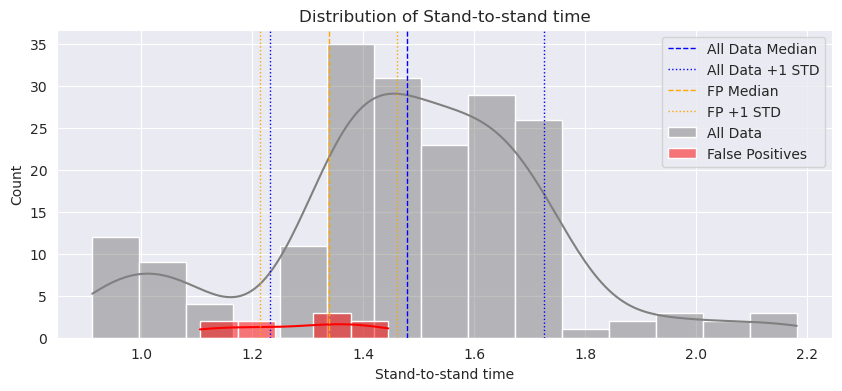

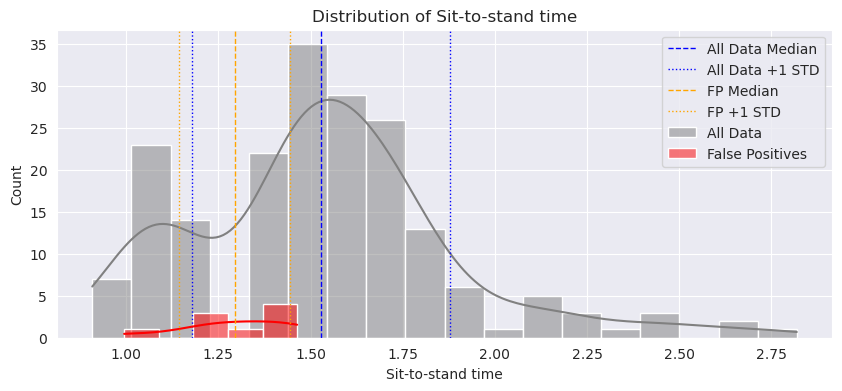

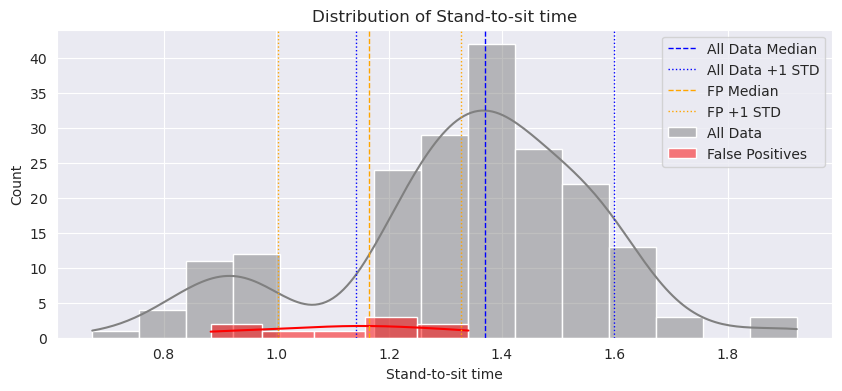

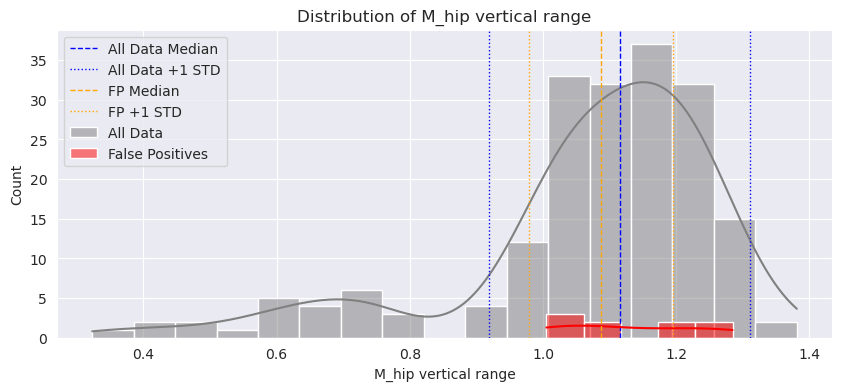

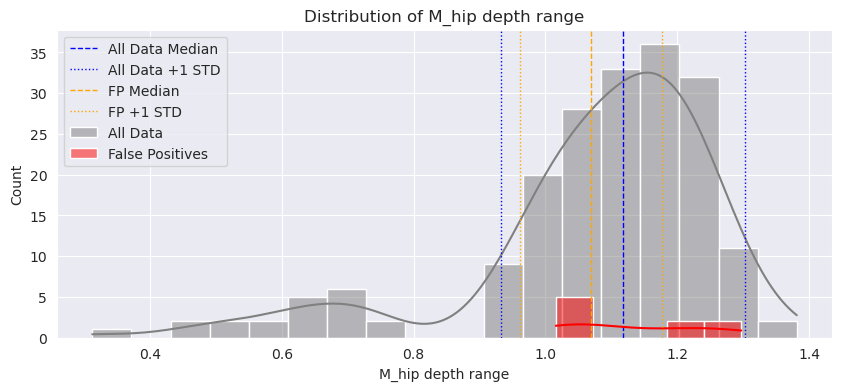

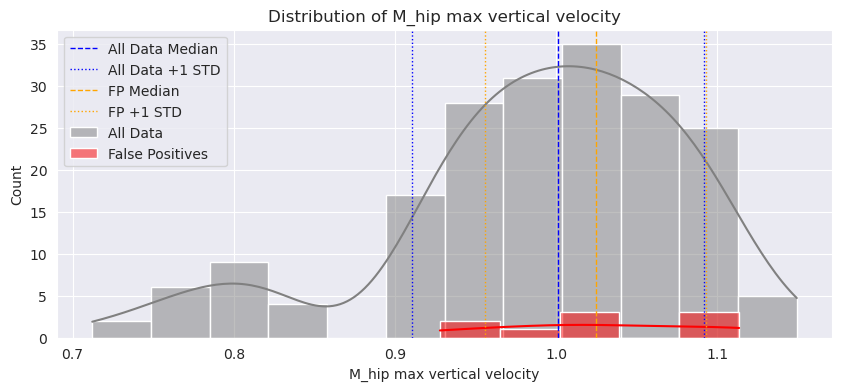

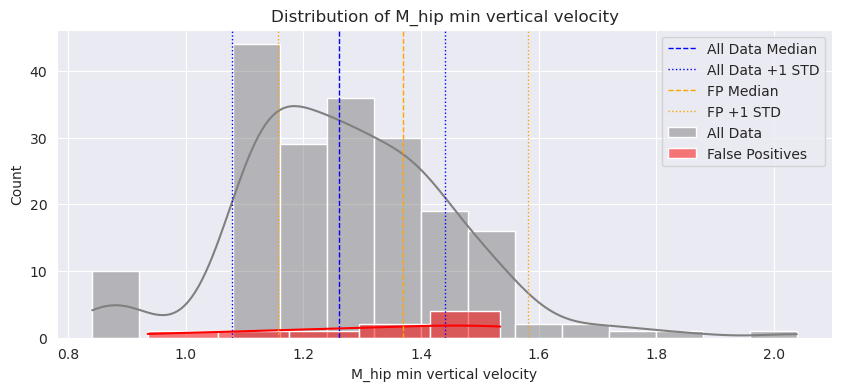

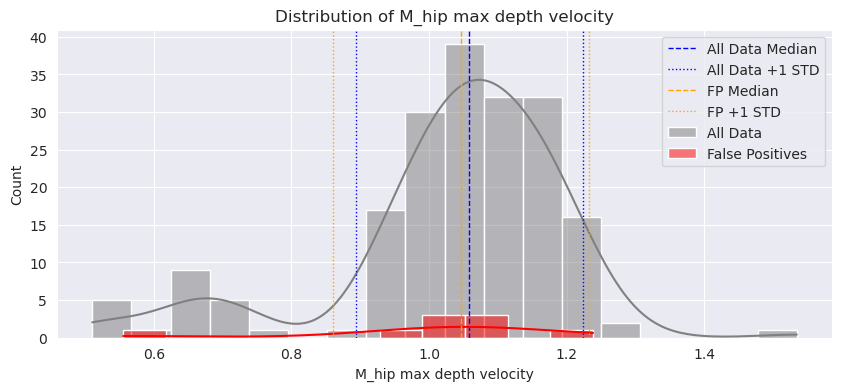

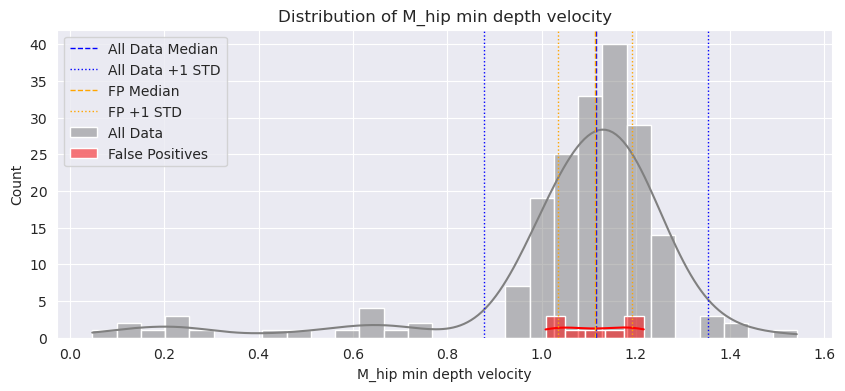

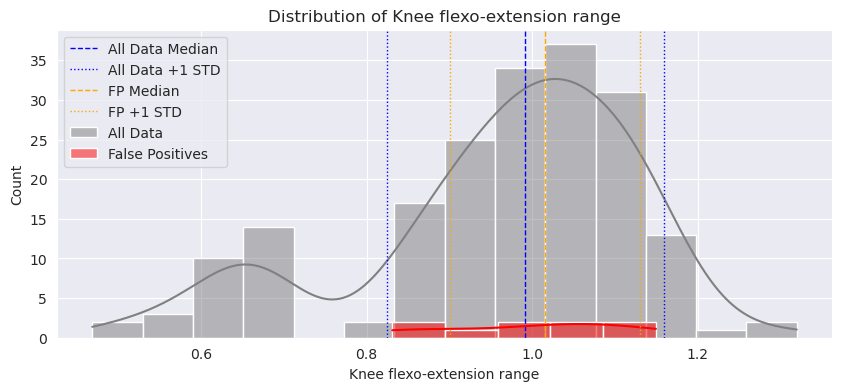

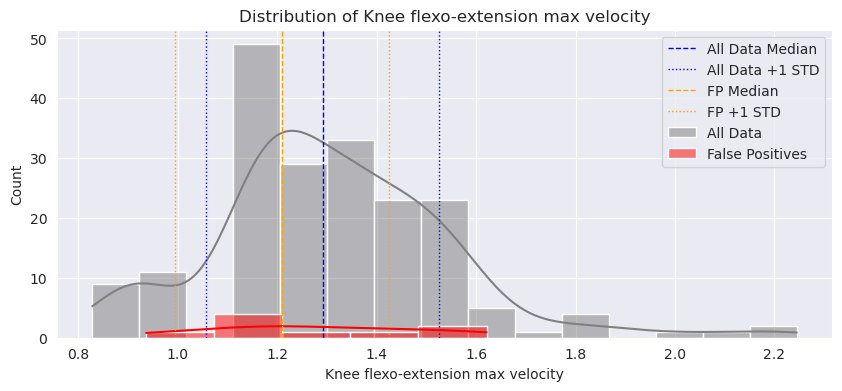

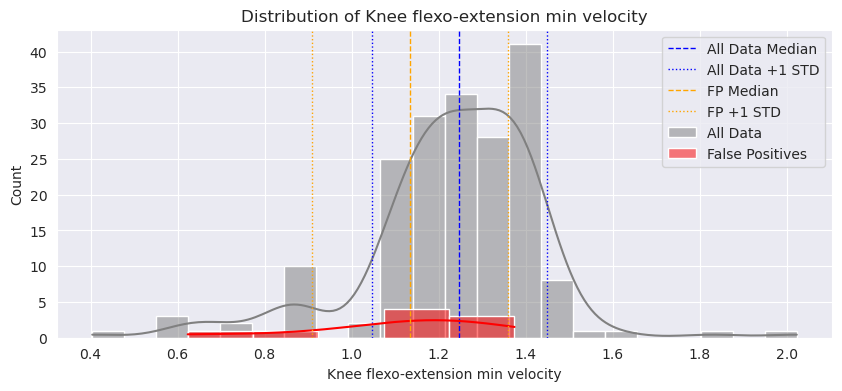

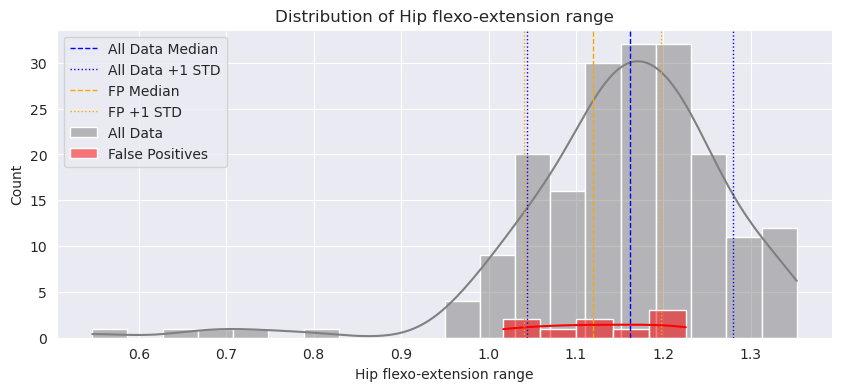

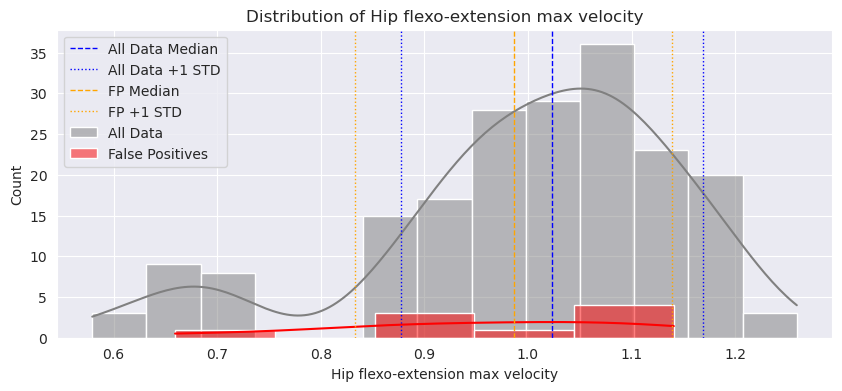

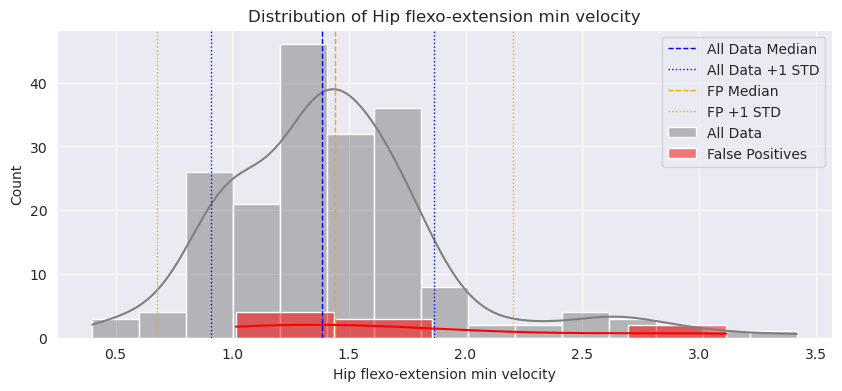

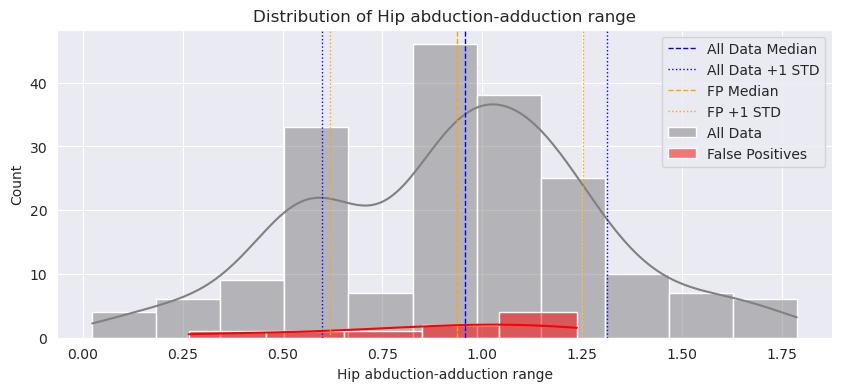

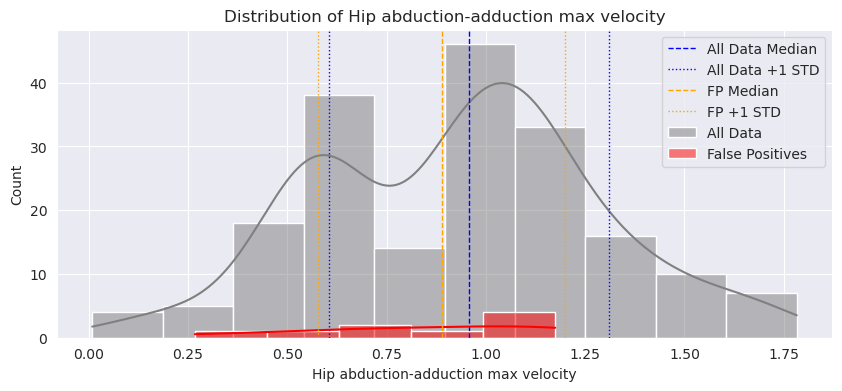

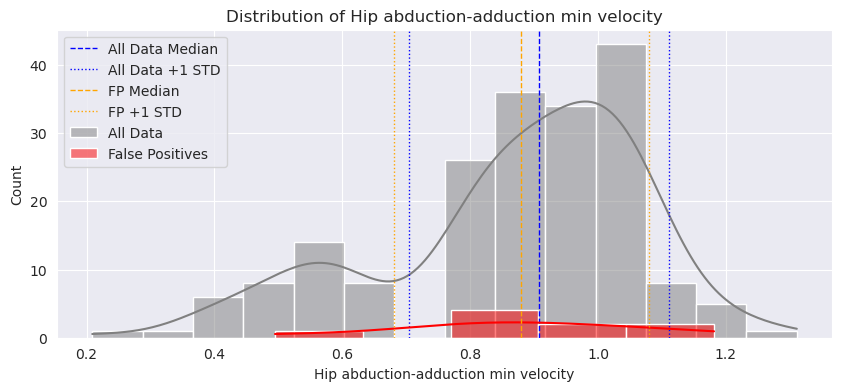

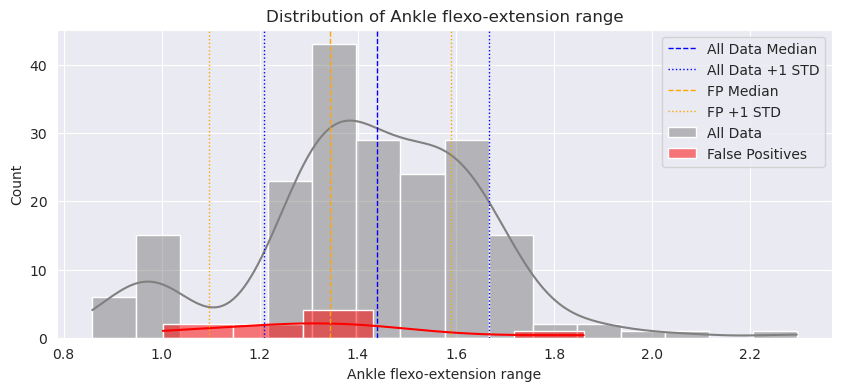

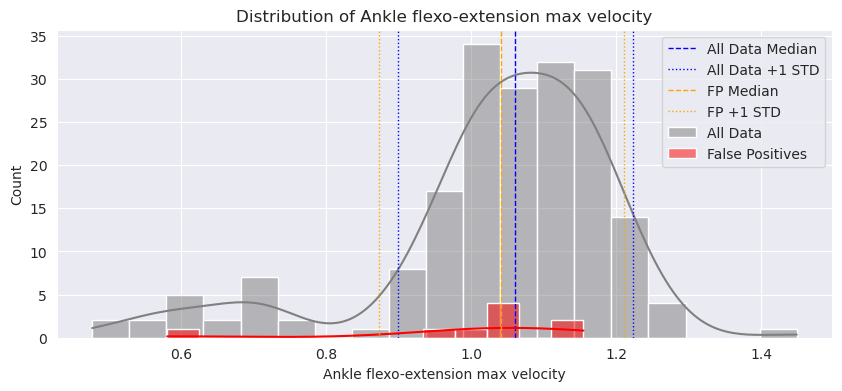

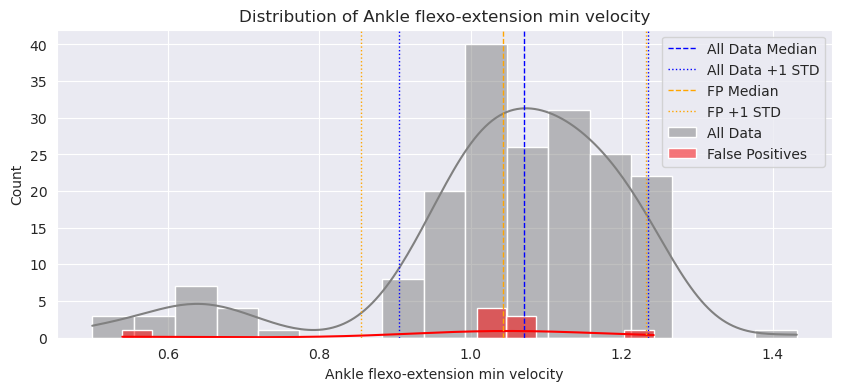

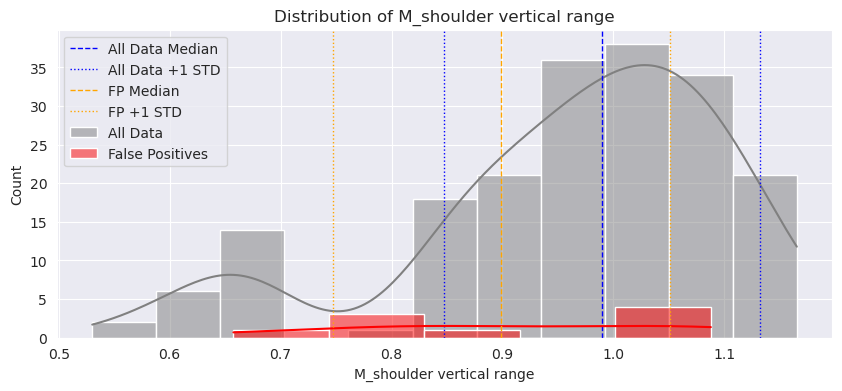

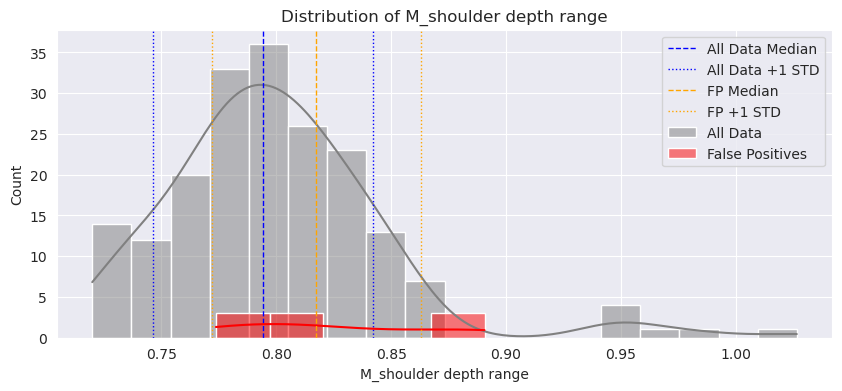

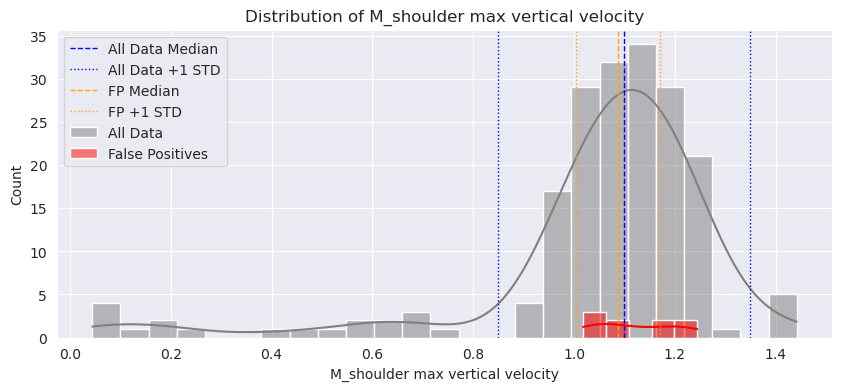

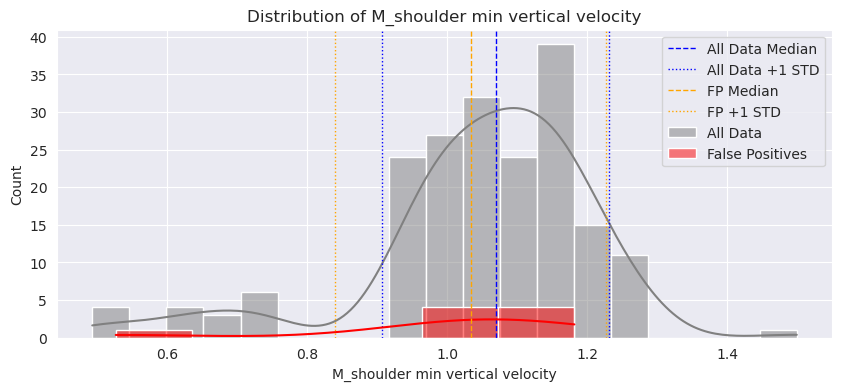

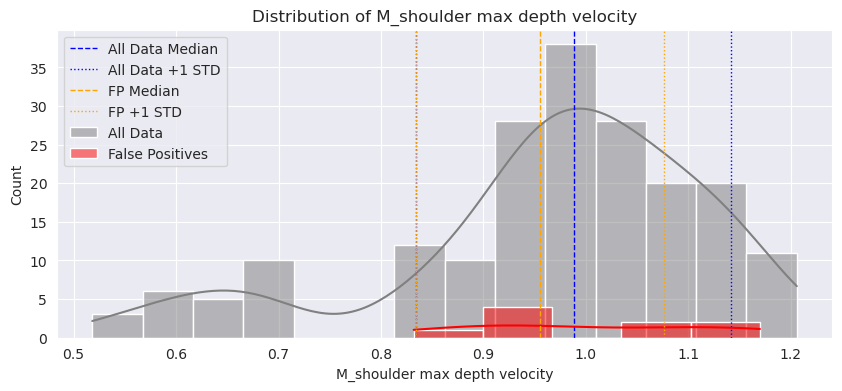

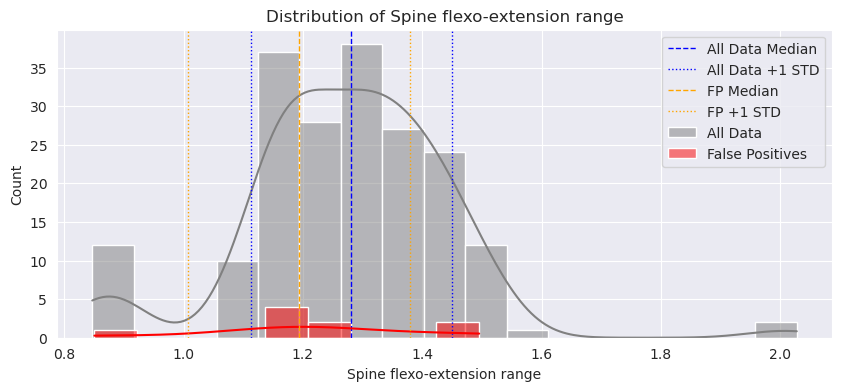

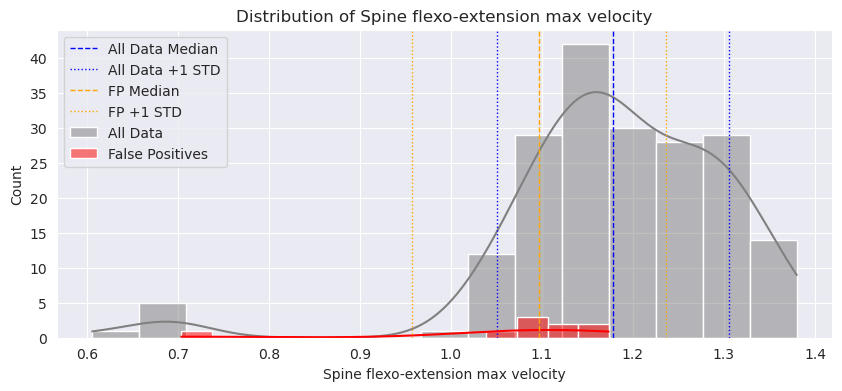

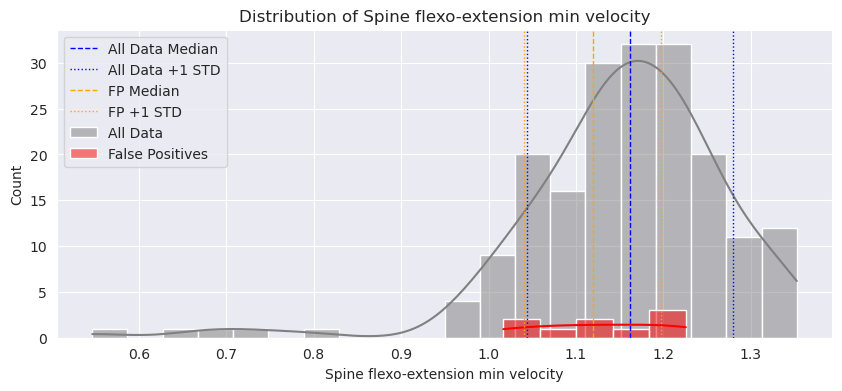

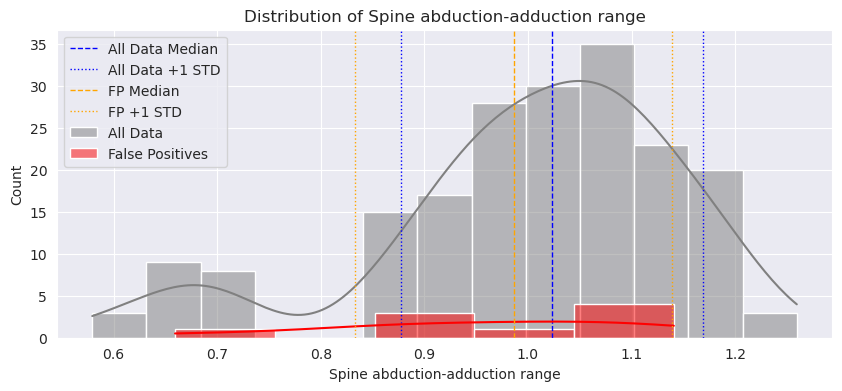

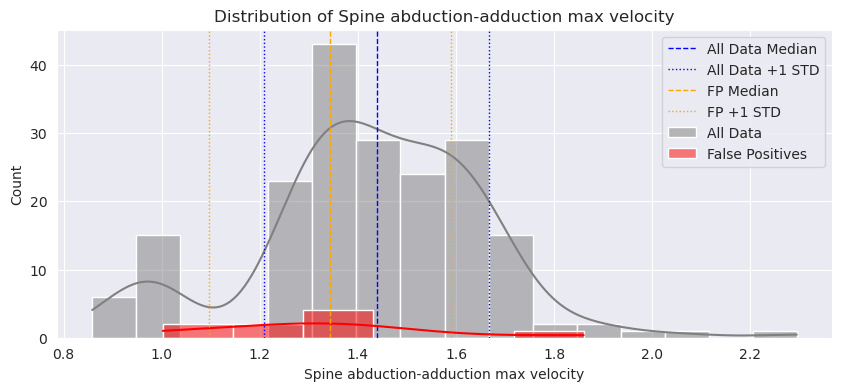

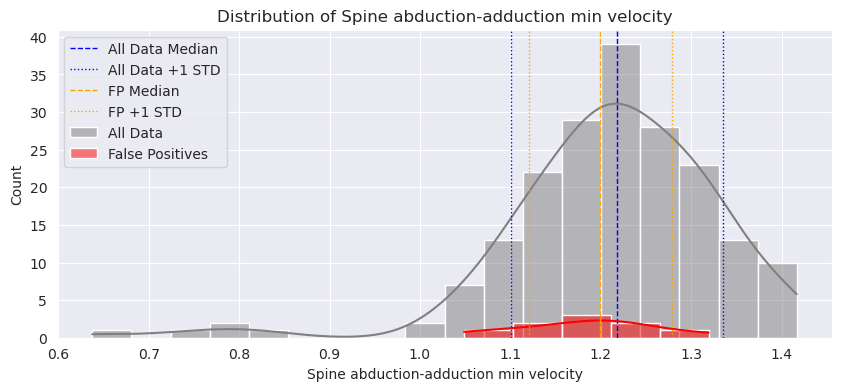

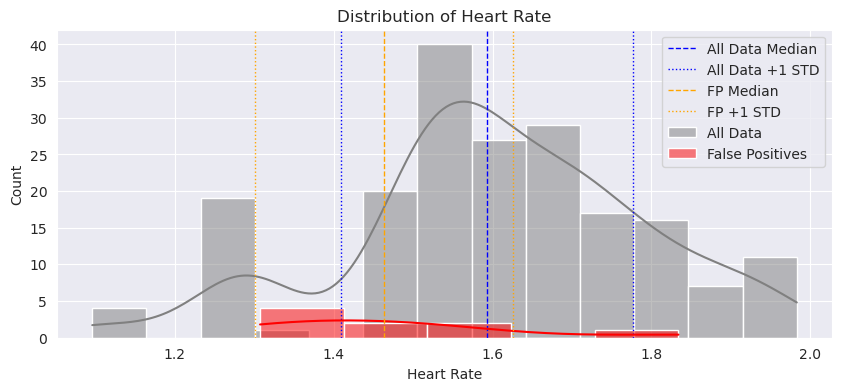

In [17]:
from matplotlib import pyplot as plt
# 对每个特征绘制直方图
import seaborn as sns

# 绘制直方图，并在上面标注中位数和一个标准差
for feature in high_dataset.columns:
    plt.figure(figsize=(10, 4))

    # 绘制整个数据集的该特征的分布
    sns.histplot(high_dataset[feature], color="grey", label="All Data", kde=True)
    # 标注整个数据集的中位数和标准差
    all_median = high_dataset[feature].median()
    all_std = high_dataset[feature].std()
    plt.axvline(all_median, color='blue', linestyle='dashed', linewidth=1, label='All Data Median')
    plt.axvline(all_median + all_std, color='blue', linestyle='dotted', linewidth=1, label='All Data +1 STD')
    plt.axvline(all_median - all_std, color='blue', linestyle='dotted', linewidth=1)

    # 绘制false positives的分布
    sns.histplot(high_medium_features[feature], color="red", label="False Positives", kde=True)
    # 标注false positives的中位数和标准差
    fp_median = high_medium_features[feature].median()
    fp_std = high_medium_features[feature].std()
    plt.axvline(fp_median, color='orange', linestyle='dashed', linewidth=1, label='FP Median')
    plt.axvline(fp_median + fp_std, color='orange', linestyle='dotted', linewidth=1, label='FP +1 STD')
    plt.axvline(fp_median - fp_std, color='orange', linestyle='dotted', linewidth=1)

    plt.title(f'Distribution of {feature}')
    plt.legend()
    plt.show()

